<a href="https://colab.research.google.com/github/shainaboover/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/SHAINA_BOOVER_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# look at plot styles you can use. default is 'fast'
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
# read in dataset. OBJECTIVE is to create the best possible plot 
# to show relation between fare, age, and cabin class
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
titanic = pd.read_csv(url)
titanic.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton


In [4]:
# how would you convert some of these variables into plots
# cabin class is catergorical. it can be displayed as integer or string values
titanic['Pclass'].value_counts().sort_index()

1    184
2    173
3    355
Name: Pclass, dtype: int64

In [5]:
# convert to string categories
titanic['cabin_class'] = titanic['Pclass'].map({1:'first', 2:'second', 3:'third'})
titanic.sample(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
578,0,2,male,25.0,26.0000,Southampton,second
359,1,3,female,5.0,19.2583,Cherbourg,third
309,1,2,female,36.0,13.0000,Southampton,second


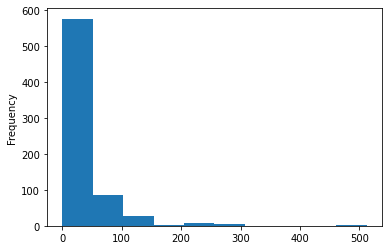

In [6]:
# fare is continuois variable, so we can display as histogram
# titanic['Fare'].value_counts().head(5)
titanic['Fare'].plot(kind='hist');

In [7]:
# the outliers are skewing the data, remove them
titanic.describe()

,Survived,Pclass,Age,Fare
count,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,34.567251
std,0.491139,0.836854,14.492933,52.938648
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,1.000000,20.000000,8.050000
50%,0.000000,2.000000,28.000000,15.645850
75%,1.000000,3.000000,38.000000,33.000000
max,1.000000,3.000000,80.000000,512.329200


In [8]:
# print shape before and after to see the difference
print(titanic.shape)
titanic = titanic[titanic['Fare']<500]
print(titanic.shape)

(712, 7)
(709, 7)


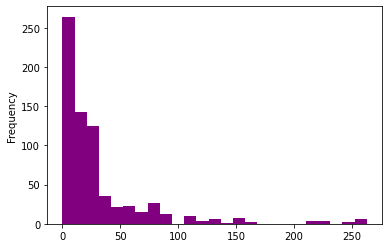

In [9]:
# now histogram will display better
# add in a color!
# add bins for finer grain 
titanic['Fare'].plot(kind='hist', color='purple', bins=25);

In [10]:
# you can use quartiles to choose cut points for binning
titanic['Fare'].describe()

count    709.000000
mean      32.545692
std       42.931277
min        0.000000
25%        8.050000
50%       15.500000
75%       32.320800
max      263.000000
Name: Fare, dtype: float64

In [11]:
# convert contiuous variable to categorical so you can bin it
# name your bins using labels
farelabels = ['low', 'medium', 'high', 'vhigh']
titanic['fare_groups'] = pd.cut(titanic['Fare'], bins=[0,8,15,32,300], labels=farelabels)
titanic[['Fare', 'fare_groups']].head()

,Fare,fare_groups
0,7.2500,low
1,71.2833,vhigh
2,7.9250,low
3,53.1000,vhigh
4,8.0500,medium


In [0]:
# check it out
# groups are close in size b/c we cut it on quartile
fare_results = titanic['fare_groups'].value_counts().sort_index()

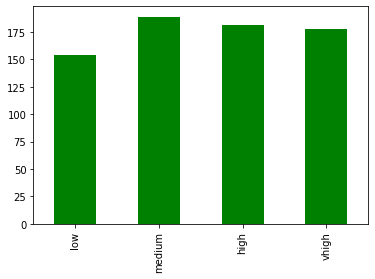

In [13]:
# display it, throw some color in there
fare_results.plot(kind='bar', color='green');

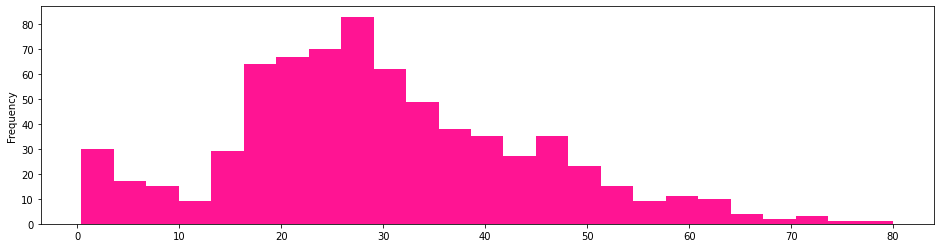

In [14]:
# histogram 
# think of figsize as arbitrary display units in matpltlib
titanic['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='deeppink');

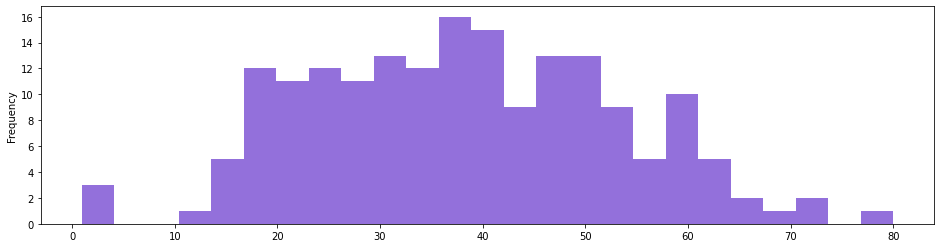

In [15]:
# you can stack variables on a histogram
# create subcategories by filtering dataset
titanic[titanic['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='mediumpurple');

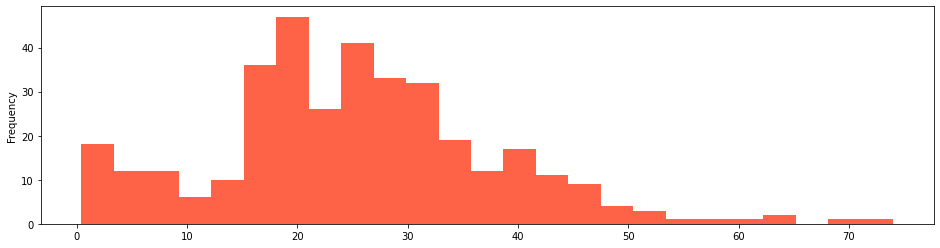

In [16]:
# pull out another variable
titanic[titanic['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='tomato');

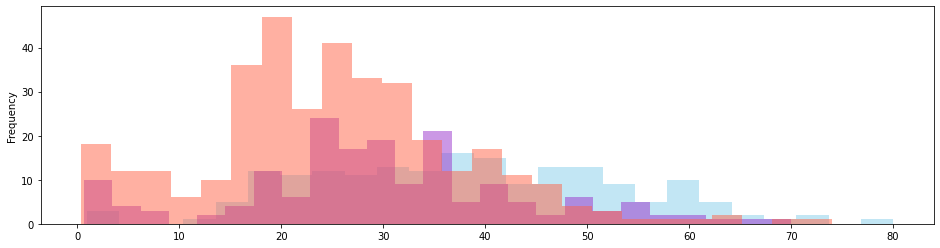

In [17]:
# you can stack these by putting them in same cell
# alpha changes transparency
titanic[titanic['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='skyblue', alpha=0.5);
titanic[titanic['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='darkorchid', alpha=0.5);
titanic[titanic['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='tomato', alpha=0.5);

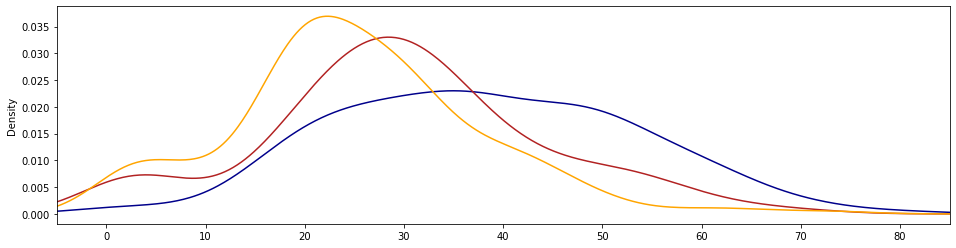

In [18]:
# Kernel Density Estimate or KDE is an easier way to read this data
# xlim removes added tails
titanic[titanic['Pclass']==1]['Age'].plot(kind='density', figsize=(16,4), color='darkblue', xlim=(-5,85));
titanic[titanic['Pclass']==2]['Age'].plot(kind='density', figsize=(16,4), color='firebrick', xlim=(-5,85));
titanic[titanic['Pclass']==3]['Age'].plot(kind='density', figsize=(16,4), color='orange', xlim=(-5,85));

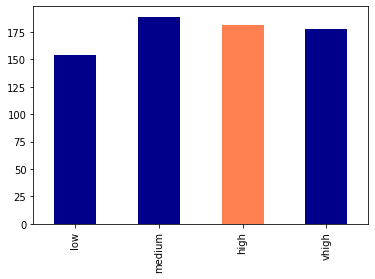

In [19]:
# display a single categorical variable
# make a value pop with color
titanic['fare_groups'].value_counts().sort_index().plot(kind='bar', color=['darkblue', 'darkblue', 'coral', 'darkblue']);

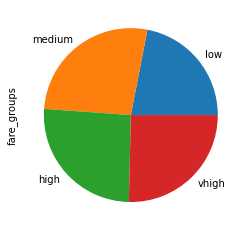

In [20]:
# pie charts are difficult to interpret
# be carful how you use these
titanic['fare_groups'].value_counts().sort_index().plot(kind='pie', figsize=(4,4));

In [21]:
# how to compare two categorical variables
cab_death = pd.crosstab(titanic['cabin_class'], titanic['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


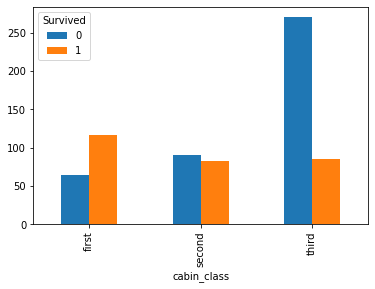

In [22]:
cab_death.plot(kind='bar');

In [23]:
# you can think of normalize as taking a percentage of index or columns values
cab_death1 = pd.crosstab(titanic['cabin_class'], titanic['Survived'], normalize='columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


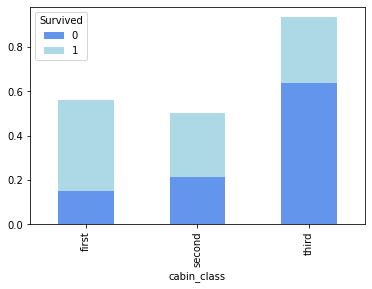

In [24]:
# make a stacked bar chart for easy comparison between two categorical values
cab_death1.plot(kind='bar', stacked=True, color=['cornflowerblue', 'lightblue']);

In [25]:
# crosstabs on column percents
cab_death2 = pd.crosstab(titanic['cabin_class'], titanic['Survived'], normalize='columns')
cab_death2

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


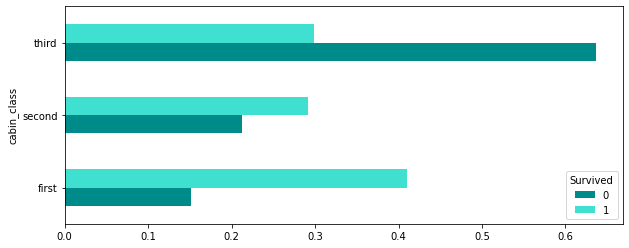

In [26]:
# paired barchart
# barh for horizontal
cab_death2.plot(kind='barh', color=['darkcyan', 'turquoise'], figsize=(10,4));

In [27]:
# look at a continuous variable
titanic['Age'].describe()
titanic['Age'].mean()
titanic['Age'].median()
titanic['Age'].std()
titanic['Age'].describe()

count    709.000000
mean      29.618011
std       14.518828
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [28]:
# explore that continuous variable by grouping it along a categorical one
# or -break out-
cab_age = titanic.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

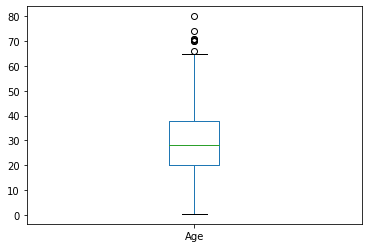

In [29]:
# visualize with boxplot
titanic['Age'].plot(kind='box');

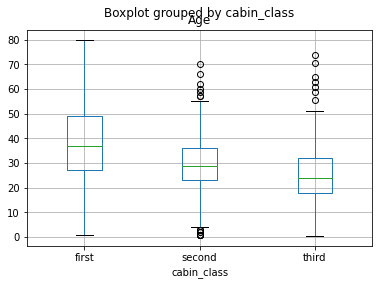

In [30]:
# boxplots come in handy when you you want to break out
# a contimuous variable by a categorical one
titanic.boxplot(column='Age', by='cabin_class');

In [31]:
# plt.style.use to change styles of plots
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

FIVETHIRTYEIGHT recreation

In [32]:
names = pd.read_csv('unisex_names_table.csv')
print(names.shape)
names.head(21)

(919, 6)


,Unnamed: 0,name,total,male_share,female_share,gap
0,1,Casey,176544.328149,0.584287,0.415713,0.168573
1,2,Riley,154860.665173,0.507639,0.492361,0.015278
2,3,Jessie,136381.830656,0.477834,0.522166,0.044331
3,4,Jackie,132928.788740,0.421133,0.578867,0.157735
4,5,Avery,121797.419516,0.335213,0.664787,0.329574
5,6,Jaime,109870.187290,0.561793,0.438207,0.123586
6,7,Peyton,94896.395216,0.433719,0.566281,0.132561
7,8,Kerry,88963.926250,0.483949,0.516051,0.032102
8,9,Jody,80400.519199,0.352068,0.647932,0.295864
9,10,Kendall,79210.873961,0.372367,0.627633,0.255267


In [33]:
names['total'].sort_values(ascending=False).head(20)

0     176544.328149
1     154860.665173
2     136381.830656
3     132928.788740
4     121797.419516
5     109870.187290
6      94896.395216
7      88963.926250
8      80400.519199
9      79210.873961
10     64151.630388
11     53486.390419
12     51288.068109
13     44781.602373
14     41920.940058
15     41237.565743
16     36360.520613
17     32636.047648
18     29528.793818
19     27350.564570
Name: total, dtype: float64

In [34]:
# get top twenty values
condition = (names['total']>25000)
condition

0       True
1       True
2       True
3       True
4       True
       ...  
914    False
915    False
916    False
917    False
918    False
Name: total, Length: 919, dtype: bool

In [35]:
top_twenty = names[condition]
top_twenty

,Unnamed: 0,name,total,male_share,female_share,gap
0,1,Casey,176544.328149,0.584287,0.415713,0.168573
1,2,Riley,154860.665173,0.507639,0.492361,0.015278
2,3,Jessie,136381.830656,0.477834,0.522166,0.044331
3,4,Jackie,132928.788740,0.421133,0.578867,0.157735
4,5,Avery,121797.419516,0.335213,0.664787,0.329574
5,6,Jaime,109870.187290,0.561793,0.438207,0.123586
6,7,Peyton,94896.395216,0.433719,0.566281,0.132561
7,8,Kerry,88963.926250,0.483949,0.516051,0.032102
8,9,Jody,80400.519199,0.352068,0.647932,0.295864
9,10,Kendall,79210.873961,0.372367,0.627633,0.255267


In [0]:
# pick a style that displays data well
plt.style.use('seaborn-white')

[Text(0, 0, 'Casey'),
 Text(0, 0, 'Riley'),
 Text(0, 0, 'Jessie'),
 Text(0, 0, 'Jackie'),
 Text(0, 0, 'Avery'),
 Text(0, 0, 'Jaime'),
 Text(0, 0, 'Peyton'),
 Text(0, 0, 'Kerry'),
 Text(0, 0, 'Jody'),
 Text(0, 0, 'Kendall'),
 Text(0, 0, 'Payton'),
 Text(0, 0, 'Skyler'),
 Text(0, 0, 'Frankie'),
 Text(0, 0, 'Pat'),
 Text(0, 0, 'Quinn'),
 Text(0, 0, 'Harley'),
 Text(0, 0, 'Reese'),
 Text(0, 0, 'Robbie'),
 Text(0, 0, 'Tommie'),
 Text(0, 0, 'Justice')]

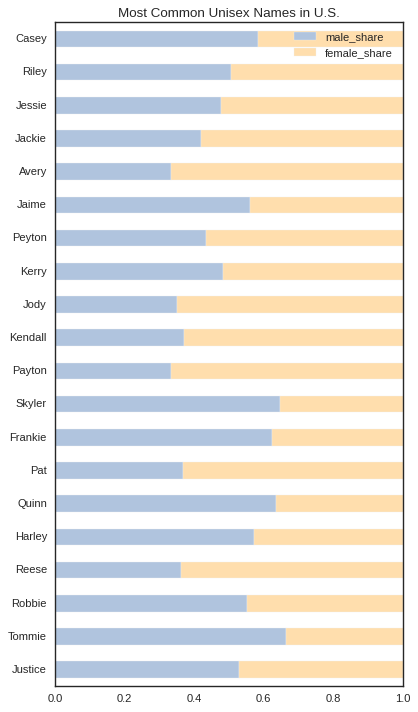

In [125]:
# plot horizontal bar chart
# note use of plt.gca to reverse y axis values
graphic1 = top_twenty[['male_share','female_share']].plot(kind='barh', 
                                               stacked=True, 
                                               figsize=(5,10), 
                                               color=['lightsteelblue', 'navajowhite'],
                                               title='Most Common Unisex Names in U.S.');
ax = plt.gca()
graphic1.set_ylim(graphic1.get_ylim()[::-1]) 
graphic1.set_yticklabels(top_twenty.name)                                              

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here